<a href="https://colab.research.google.com/github/samratchakraborty422000/Python-Practice/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression


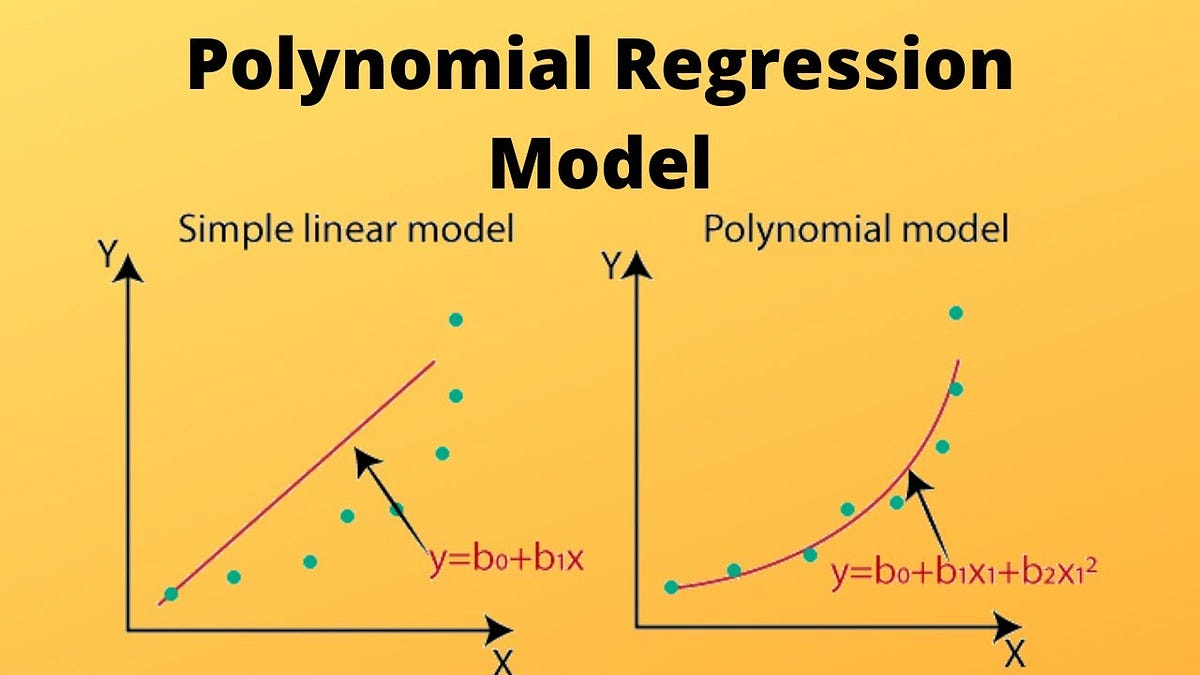

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [93]:
df = pd.read_csv('Ice_cream selling data.csv')

In [94]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [95]:
df.shape

(49, 2)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [97]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


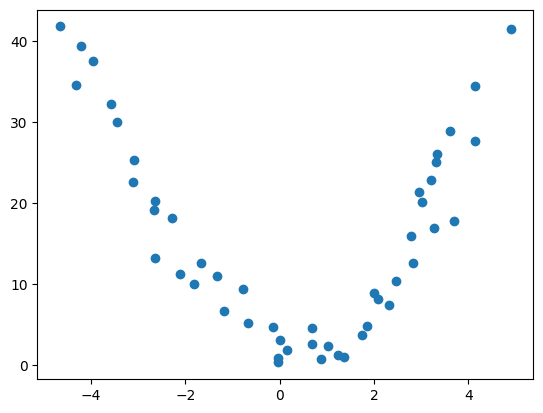

In [98]:
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'])

we can see the distribution curve is non linear (pow(x)>1)

## Splitting The Dataset

In [99]:
from sklearn.model_selection import train_test_split
X = df[['Temperature (°C)']]
Y = df['Ice Cream Sales (units)']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

## Model Training

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('poly', PolynomialFeatures(degree= 3, include_bias = False)),
    ('linear_reg',LinearRegression())
])

model.fit(X_train,Y_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('linear_reg', LinearRegression())])

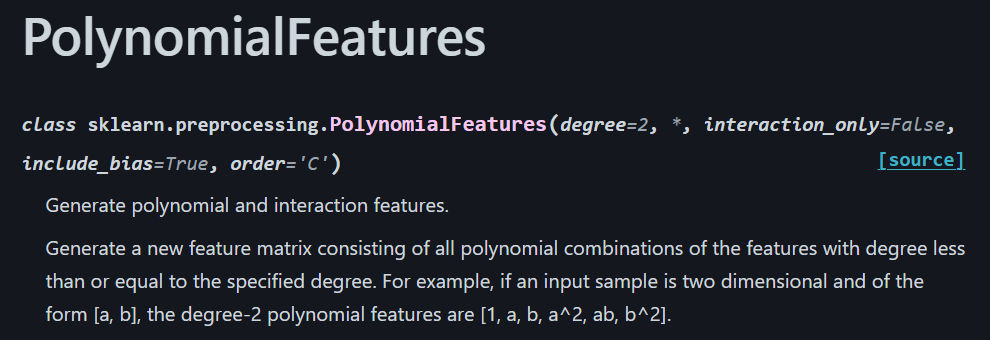

## Performance Metrics

MSE , MEA, R2

In [101]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
Y_test_pred = model.predict(X_test)
r2 = r2_score(Y_test,Y_test_pred)
mse = mean_squared_error(Y_test, Y_test_pred)
mae = mean_absolute_error(Y_test,Y_test_pred)
print("r squared value is: ",r2)
print("mean squared errror is : ",mse)
print("mean absolute error is: ",mae)

r squared value is:  0.8405107685716917
mean squared errror is :  15.12000945122946
mean absolute error is:  3.228121129776889


Adjusted R2

In [102]:
#calculation of adj r2
adj_r_squared=1-(1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
# X_test.shape will give [row,column] like (5,1) so we need to extract the column number


adj_r_squared

0.8205746146431532

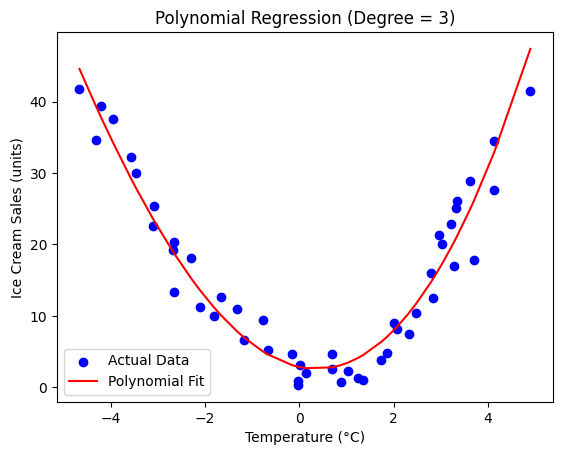

In [103]:
Y_pred = model.predict(X)
plt.scatter(X, Y, color='blue', label='Actual Data')

# Line plot of predicted curve
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')

plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Polynomial Regression (Degree = 3)')
plt.legend()
plt.show()

#Lets see what happens if we increase degree of the polynomial

increasing the power of X will make it overfit

In [104]:
model_20 = Pipeline([
    ('poly', PolynomialFeatures(degree= 20, include_bias = False)), # degree=20
    ('linear_reg',LinearRegression())
])

model_20.fit(X_train,Y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20, include_bias=False)),
                ('linear_reg', LinearRegression())])

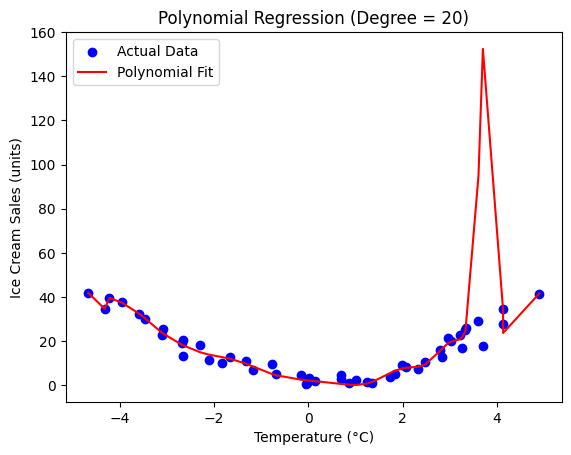

In [105]:
Y_pred = model_20.predict(X)
plt.scatter(X, Y, color='blue', label='Actual Data')

# Line plot of predicted curve
plt.plot(X, Y_pred, color='red', label='Polynomial Fit')

plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Polynomial Regression (Degree = 20)')
plt.legend()
plt.show()

So we have to carefully choose the degree